In [1]:
import gustaf as gus
import numpy as np
import splinepy as sp
import vedo

vedo.settings.default_backend = 'k3d'


import igl
import matplotlib.pyplot as plt
import torch

import deep_sdf.utils
from deep_sdf import workspace as ws
from sdf_sampler.plotting import scatter_contour_at_origin

params = {'text.usetex': False, 'mathtext.fontset': 'cm', 'axes.labelsize': 12}
plt.rcParams.update(params)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device = torch.device("cpu")

In [2]:
experiment_directory = "../../experiments/round_cross_big_network"
checkpoint = "1000"

graded = True

latent = ws.load_latent_vectors(experiment_directory, checkpoint).to("cpu").numpy()
decoder = ws.load_trained_model(experiment_directory, checkpoint).to(device)
decoder.eval()

Decoder(
  (lin0): ParametrizedLinear(
    in_features=4, out_features=128, bias=True
    (parametrizations): ModuleDict(
      (weight): ParametrizationList(
        (0): _WeightNorm()
      )
    )
  )
  (lin1): ParametrizedLinear(
    in_features=128, out_features=124, bias=True
    (parametrizations): ModuleDict(
      (weight): ParametrizationList(
        (0): _WeightNorm()
      )
    )
  )
  (lin2): ParametrizedLinear(
    in_features=128, out_features=128, bias=True
    (parametrizations): ModuleDict(
      (weight): ParametrizationList(
        (0): _WeightNorm()
      )
    )
  )
  (lin3): ParametrizedLinear(
    in_features=128, out_features=128, bias=True
    (parametrizations): ModuleDict(
      (weight): ParametrizationList(
        (0): _WeightNorm()
      )
    )
  )
  (lin4): ParametrizedLinear(
    in_features=128, out_features=128, bias=True
    (parametrizations): ModuleDict(
      (weight): ParametrizationList(
        (0): _WeightNorm()
      )
    )
  )
  (lin5)

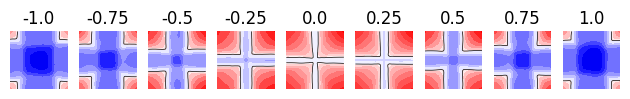

In [7]:
def sdf_struct(queries, latent_vector):
    queries = torch.tensor(queries).to(torch.float32).to(device)
    latent_vector = torch.tensor([latent_vector]).to(torch.float32).to(device)
    return deep_sdf.utils.decode_sdf(decoder, latent_vector, queries).squeeze(1).detach().cpu().numpy()
n_plots = 9
fig, axs = plt.subplots(1, n_plots, figsize=(20/2.54, 5/2.54))
latent_vectors = np.linspace(-1,1,n_plots)
for ax, lv in zip(axs.flatten(), latent_vectors):
    sdf_struct_plot = lambda queries: sdf_struct(queries, lv)
    scatter_contour_at_origin(sdf_struct_plot, normal=(0,1,0), custom_axis=ax, res=1000, flip_axes=True, eval_area=(-1,1), scale=(1,1))
    ax.set_title(lv)